# Нейронные сети с Keras
Keras -- простая библиотека для написания нейронных сетей. Keras не позволяет строить сложные модели со специфическими функциями потерь, но зато удобен в использовании. Синтаксис Keras напоминает синтаксис sklearn.

In [1]:
import numpy as np
import keras, keras.layers as L

Using TensorFlow backend.


Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


### Введение
Основной класс для работы с керасом -- модель Sequential. В модель можно последовательно добавлять слои нейронной сети. 

После добавления всех слоёв можно вызвать model.compile, указав в аргументах функцию потерь, оптимизатор и метрику, которую необходимо считать при оптиимзации.

Функция .summary выводит информацию о нейронной сети.

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer(input_shape=[64]))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [2]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               6500      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 7,510
Trainable params: 7,510
Non-trainable params: 0
_________________________________________________________________


Обучим модель на датасете digits. 

In [3]:
from sklearn.datasets import load_digits
X, y = load_digits(return_X_y=True)

model.fit(X, y, epochs=3)

y_pred = model.predict_classes(X)
y_proba = model.predict_proba(X)

from sklearn.metrics import accuracy_score
print("\nAccuracy = %.3f" % accuracy_score(y, y_pred))

Epoch 1/3
1797/1797 [==============================] - 1s - loss: 2.8859 - acc: 0.4352     
Epoch 2/3
1797/1797 [==============================] - 0s - loss: 0.4349 - acc: 0.8703     
Epoch 3/3
  32/1797 [..............................] - ETA: 0s
Accuracy = 0.949


### Обобщающая способность нейронной сети
Визуализируем предсказания нейронной сети на простой задаче восстановления одномерной зависимости. 

In [5]:
import matplotlib.pyplot as plt

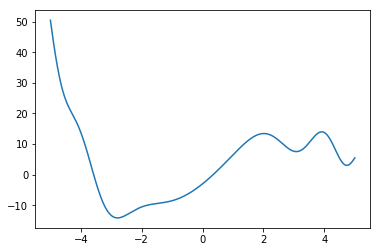

In [35]:
X = np.linspace(-5, 5, 1000)
y = 0.05 * X ** 4 - 0.5 * X ** 3 + 8 * X - 3 + 4 * np.sin(X**2 / 2)
plt.plot(X,y)

Подберём нейронную сеть, хорошо приближающую нашу функцию.

In [41]:
model = keras.models.Sequential()
model.add(L.InputLayer([1]))
model.add(L.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [42]:
model.fit(X,y, epochs=100)

Epoch 1/500
1000/1000 [==============================] - 0s - loss: 156.3388     
Epoch 2/500
1000/1000 [==============================] - 0s - loss: 151.0584     
Epoch 3/500
1000/1000 [==============================] - 0s - loss: 150.7548     
Epoch 4/500
1000/1000 [==============================] - 0s - loss: 150.5290     
Epoch 5/500
1000/1000 [==============================] - 0s - loss: 150.2900     
Epoch 6/500
1000/1000 [==============================] - 0s - loss: 149.9836     
Epoch 7/500
1000/1000 [==============================] - 0s - loss: 149.9317     
Epoch 8/500
1000/1000 [==============================] - 0s - loss: 149.4093     
Epoch 9/500
1000/1000 [==============================] - 0s - loss: 148.9618    
Epoch 10/500
1000/1000 [==============================] - 0s - loss: 148.3615     
Epoch 11/500
1000/1000 [==============================] - 0s - loss: 147.7070     
Epoch 12/500
1000/1000 [==============================] - 0s - loss: 146.9079     
Epoch 13/500
1

1000/1000 [==============================] - 0s - loss: 4.8677     
Epoch 102/500
1000/1000 [==============================] - 0s - loss: 4.8637     
Epoch 103/500
1000/1000 [==============================] - 0s - loss: 4.8245     
Epoch 104/500
1000/1000 [==============================] - 0s - loss: 4.8683     
Epoch 105/500
1000/1000 [==============================] - 0s - loss: 4.9132     
Epoch 106/500
1000/1000 [==============================] - 0s - loss: 4.9013     
Epoch 107/500
1000/1000 [==============================] - 0s - loss: 4.7889     
Epoch 108/500
1000/1000 [==============================] - 0s - loss: 4.8447     
Epoch 109/500
1000/1000 [==============================] - 0s - loss: 4.9082     
Epoch 110/500
1000/1000 [==============================] - 0s - loss: 4.6536     
Epoch 111/500
1000/1000 [==============================] - 0s - loss: 4.6294     
Epoch 112/500
1000/1000 [==============================] - 0s - loss: 4.5681     
Epoch 113/500
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 3.3926     
Epoch 202/500
1000/1000 [==============================] - 0s - loss: 3.2547     
Epoch 203/500
1000/1000 [==============================] - 0s - loss: 3.2736     
Epoch 204/500
1000/1000 [==============================] - 0s - loss: 3.3035     
Epoch 205/500
1000/1000 [==============================] - 0s - loss: 3.2706     
Epoch 206/500
1000/1000 [==============================] - 0s - loss: 3.3165     
Epoch 207/500
1000/1000 [==============================] - 0s - loss: 3.2344     
Epoch 208/500
1000/1000 [==============================] - 0s - loss: 3.4376     
Epoch 209/500
1000/1000 [==============================] - 0s - loss: 3.2494     
Epoch 210/500
1000/1000 [==============================] - 0s - loss: 3.3270     
Epoch 211/500
1000/1000 [==============================] - 0s - loss: 3.3522     
Epoch 212/500
1000/1000 [==============================] - 0s - loss: 3.2089     
Epoch 213/500
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 2.7308     
Epoch 302/500
1000/1000 [==============================] - 0s - loss: 2.7460     
Epoch 303/500
1000/1000 [==============================] - 0s - loss: 2.7184     
Epoch 304/500
1000/1000 [==============================] - 0s - loss: 2.6950     
Epoch 305/500
1000/1000 [==============================] - 0s - loss: 2.6789     
Epoch 306/500
1000/1000 [==============================] - 0s - loss: 2.7048     
Epoch 307/500
1000/1000 [==============================] - 0s - loss: 2.7111     
Epoch 308/500
1000/1000 [==============================] - 0s - loss: 2.6990     
Epoch 309/500
1000/1000 [==============================] - 0s - loss: 2.6688     
Epoch 310/500
1000/1000 [==============================] - 0s - loss: 2.6977     
Epoch 311/500
1000/1000 [==============================] - 0s - loss: 2.7256     
Epoch 312/500
1000/1000 [==============================] - 0s - loss: 2.8156     
Epoch 313/500
1000/1000 [=====

1000/1000 [==============================] - 0s - loss: 2.4867     
Epoch 402/500
1000/1000 [==============================] - 0s - loss: 2.4595     
Epoch 403/500
1000/1000 [==============================] - 0s - loss: 2.4559     
Epoch 404/500
1000/1000 [==============================] - 0s - loss: 2.4677     
Epoch 405/500
1000/1000 [==============================] - 0s - loss: 2.3951     
Epoch 406/500
1000/1000 [==============================] - 0s - loss: 2.3965     
Epoch 407/500
1000/1000 [==============================] - 0s - loss: 2.4074     
Epoch 408/500
1000/1000 [==============================] - 0s - loss: 2.4448     
Epoch 409/500
1000/1000 [==============================] - 0s - loss: 2.4720     
Epoch 410/500
1000/1000 [==============================] - 0s - loss: 2.3799     
Epoch 411/500
1000/1000 [==============================] - 0s - loss: 2.4909     
Epoch 412/500
1000/1000 [==============================] - 0s - loss: 2.3756     
Epoch 413/500
1000/1000 [=====

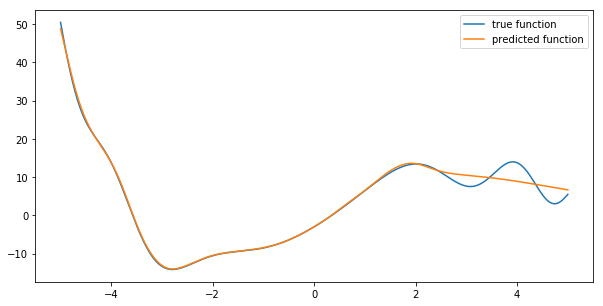

In [43]:
plt.figure(figsize=(10,5))
plt.plot(X,y, label='true function')
plt.plot(X, model.predict(X), label='predicted function')
plt.legend()
plt.show()

Построим на Keras более сложную модель. Это можно сделать так: создать слои, применять слои к предыдущим слоям, затем явно указать входы и выходы модели. Например:

In [ ]:
l_inp = L.Input([64])

l_dense1 = L.Dense(50, activation='sigmoid')(l_inp)
l_dense2 = L.Dense(100, activation='relu')(l_input)

l_concat = L.Concatenate()([l_dense1, l_dense2])
l_pre_output = L.Dense(100)(l_concat)
l_out = L.Activation('softmax')(l_output)

model = keras.models.Model(inputs=[l_inp], outputs=[l_out])

### Как выстрелить себе в ногу с Keras

* __Задача:__ Предсказать цену дома в $mil
* __Вход:__ 39 признаков этого дома

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization())
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros()))
model.add(L.Dense(1))

model.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([39]))
model.add(L.BatchNormalization()) #<- можно просто нормализовать входы 
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-инициализация нулями
model.add(L.Dense(128, kernel_initializer=keras.initializers.zeros())) #<-
model.add(L.Dense(1)) #<- три линейных слоя подряд ни к чему не приведут

model.compile(optimizer='sgd', loss='mean_squared_error') 

* __Задача:__ Распознать рукописную цифру (0-9)
* __Вход:__ картинка 28 x 28 пикселей (ч/б)

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Conv2D(filters=512, kernel_size=(3, 3)))
model.add(L.Activation('relu'))
model.add(L.MaxPool2D(pool_size=(2, 2)))
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1))
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))

model.compile(optimizer='rmsprop', loss='mean_squared_error')

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([28, 28, 1]))
model.add(L.Conv2D(filters=512, kernel_size=(3, 3)))
# ^ многовато фильтров, вряд ли найдётся 512 значимо разных 3x3 карты
model.add(L.Activation('relu'))
model.add(L.MaxPool2D(pool_size=(2, 2)))
# ^ relu и max pool можно переставить местами, будет то же самое чуть быстрее (не ошибка)
model.add(L.Flatten())
model.add(L.Dense(100))
model.add(L.Activation('relu'))
model.add(L.Dropout(0.1)) # < хороший, годный дропаут
model.add(L.Dense(10))
model.add(L.Activation('softmax'))
model.add(L.Dropout(0.1))
# ^ не стоит dropout-ить вероятности на выходе, рискуете получить бесконечный лосс
model.compile(optimizer='rmsprop', loss='mean_squared_error')
# ^ обучать классификацию по квадратичной ошибке можно, но... это безбожно

* __Задача:__ классификация одежды (10 классов)
* __Вход:__ картинка RGB 100 x 100 пикселей

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([100, 100, 3]))

for filters in [32, 64, 128, 256]:
    model.add(L.Conv2D(filters, kernel_size=(5, 5)))
    model.add(L.Conv2D(filters, kernel_size=(1, 1)))
    model.add(L.MaxPooling2D(pool_size=(3, 3)))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())

model.add(L.Flatten())

model.add(L.Dense(100, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_accuracy')

In [ ]:
model = keras.models.Sequential()
model.add(L.InputLayer([100, 100, 3]))

for filters in [32, 64, 128, 256]:
    # ^ на четвёртой итерации вход станет меньше 5x5, свёртка "не влезет"
    model.add(L.Conv2D(filters, kernel_size=(5, 5)))
    model.add(L.Conv2D(filters, kernel_size=(1, 1)))
    # ^ свёртка 1x1 имела бы смысл, если бы перед ней была нелинейность
    model.add(L.MaxPooling2D(pool_size=(3, 3)))
    model.add(L.Activation('relu'))
    model.add(L.BatchNormalization())
    # ^ не ошибка, но рекоммендуют вставлять BatchNorm перед активацией

model.add(L.Flatten())

model.add(L.Dense(100, activation='relu'))
model.add(L.Dropout(0.5))
model.add(L.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_accuracy')
# accuracy имеет нулевую производную, поэтому оптимизировать лучше кроссэнтропию
# (sparse_categorical_crossentropy)

### Обучение нейронной сети на примере датасета cifar10

In [ ]:
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10**4, random_state=42)

class_names = np.array(['airplane','automobile ','bird ','cat ','deer ','dog ','frog ','horse ','ship ','truck'])

print (X_train.shape,y_train.shape)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=[12,10])
for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.xlabel(class_names[y_train[i, 0]])
    plt.imshow(X_train[i])

Нормировка:

In [ ]:
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

In [ ]:
model = keras.models.Sequential()

model.add(L.InputLayer(input_shape=[32,32,3]))
model.add(L.Flatten())
model.add(L.Dense(300, activation='relu'))
model.add(L.Dense(100, activation='relu'))
model.add(L.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=7, validation_data=[X_val, y_val])

In [ ]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.45, "Not good enough. Back to the drawing board :)"
print(" Not bad!")

### Улучшаем модель
Составьте и обучите модель, состоящую из следующих слоёв:

- Входной слой
- Свёртка 3x3 с 10 фильтрами
- Нелинейность на ваш вкус
- Max-pooling 2x2
- Вытягиваем оставшееся в вектор (Flatten)
- Полносвязный слой на 100 нейронов
- Нелинейность на ваш вкус
- Выходной полносвязный слой с softmax

In [ ]:
model = keras.models.Sequential()

# Ваш код: создайте модель

model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=[X_val, y_val])

In [ ]:
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test, model.predict_classes(X_test))
print("\n Test_acc =", test_acc)
assert test_acc > 0.50, "Not good enough. Back to the drawing board :)"
print(" Not bad!")